In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
# Loading the data
file_path = "C:/Users/USER/OneDrive - University of Lincoln/Desktop/Tracy/Work/Portofolio/Projects/Data/User Based/Netflix Userbase.xlsx"
data = pd.read_excel(file_path)

data.head()


,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month


# Exploratory Data Analysis

In [4]:
# Checking the first few rows and basic info
print(data.info())
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   datetime64[ns]
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 195.4+ KB
None
          User ID  Monthly Revenue          Age
count  2500.00000      2500.000000  2500.000000
mean   1250.50000        12.508400    38.795600
std     721.8

In [6]:
# Total monthly revenue by subscription type
total_revenue_by_type = data.groupby("Subscription Type")["Monthly Revenue"].sum()
print("Total Monthly Revenue by Subscription Type:\n", total_revenue_by_type)

# Average revenue per user (ARPU)
arpu = data["Monthly Revenue"].mean()
print("Average Revenue per User (ARPU):", arpu)


Total Monthly Revenue by Subscription Type:
 Subscription Type
Basic       12469
Premium      9229
Standard     9573
Name: Monthly Revenue, dtype: int64
Average Revenue per User (ARPU): 12.5084


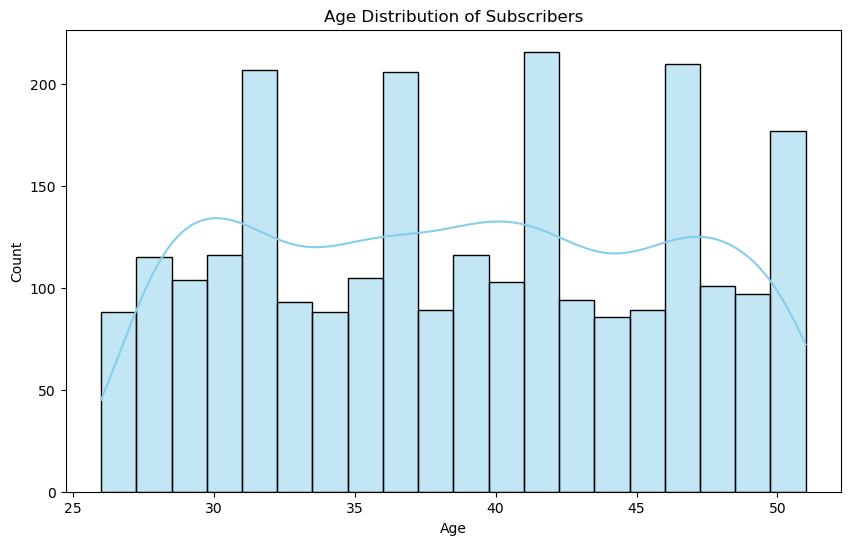

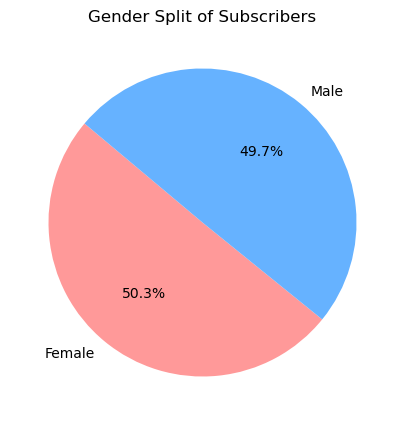

In [7]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data["Age"], kde=True, color="skyblue", bins=20)
plt.title("Age Distribution of Subscribers")
plt.xlabel("Age")
plt.show()

# Gender split
gender_counts = data["Gender"].value_counts()
plt.figure(figsize=(8, 5))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=["#FF9999", "#66B2FF"])
plt.title("Gender Split of Subscribers")
plt.ylabel('')
plt.show()


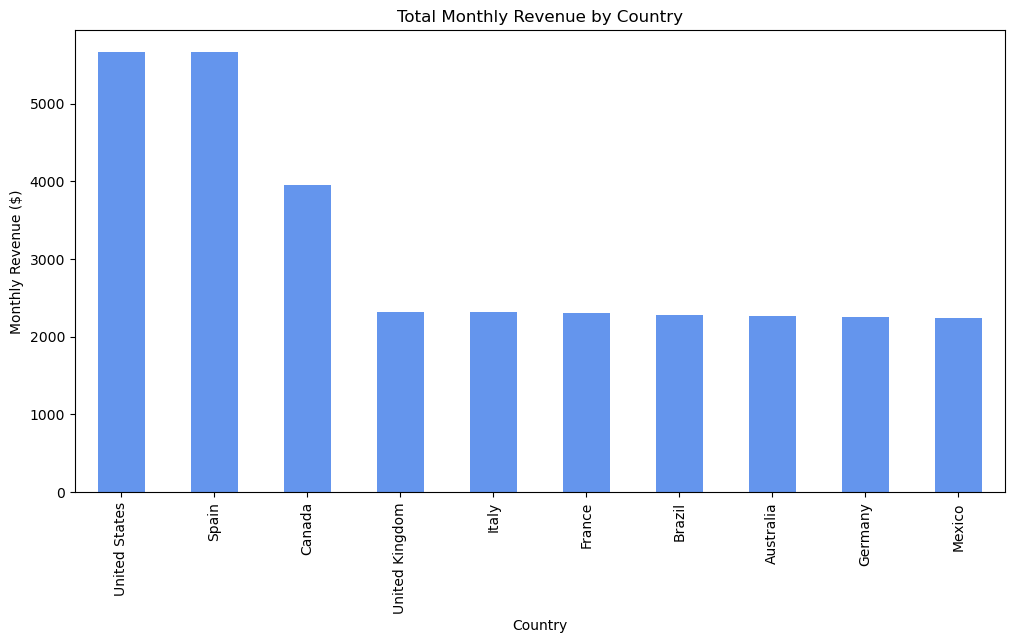

In [8]:
# Revenue by country
revenue_by_country = data.groupby("Country")["Monthly Revenue"].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
revenue_by_country.plot(kind='bar', color="cornflowerblue")
plt.title("Total Monthly Revenue by Country")
plt.xlabel("Country")
plt.ylabel("Monthly Revenue ($)")
plt.show()


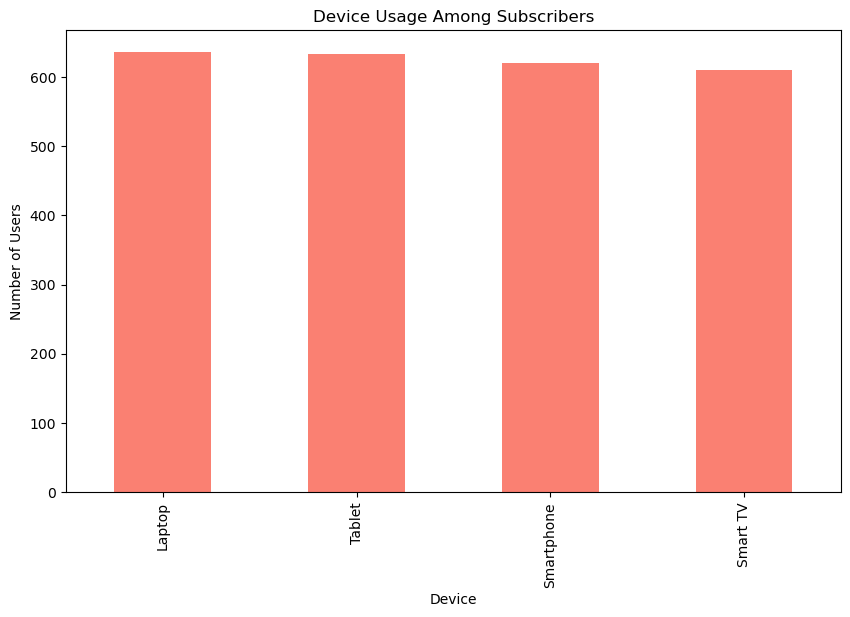

In [9]:
# Device usage count
device_counts = data["Device"].value_counts()
plt.figure(figsize=(10, 6))
device_counts.plot(kind='bar', color="salmon")
plt.title("Device Usage Among Subscribers")
plt.xlabel("Device")
plt.ylabel("Number of Users")
plt.show()


In [13]:
import pandas as pd
from datetime import datetime

reference_date = datetime(2023, 7, 15)

# Converting dates to datetime format
data["Join Date"] = pd.to_datetime(data["Join Date"])
data["Last Payment Date"] = pd.to_datetime(data["Last Payment Date"])

# Calculating days since last payment from the reference date
data["Days Since Last Payment"] = (reference_date - data["Last Payment Date"]).dt.days

# Flagging at-risk customers based on days since last payment 
data["At Risk of Churn"] = data["Days Since Last Payment"] > 30

# Counting at-risk users
at_risk_count = data["At Risk of Churn"].sum()
print("Number of users at risk of churn:", at_risk_count)


Number of users at risk of churn: 1


Average Months Subscribed by Subscription Type:
 Subscription Type
Basic       10.158158
Premium     10.165075
Standard    10.296875
Name: Months Subscribed, dtype: float64


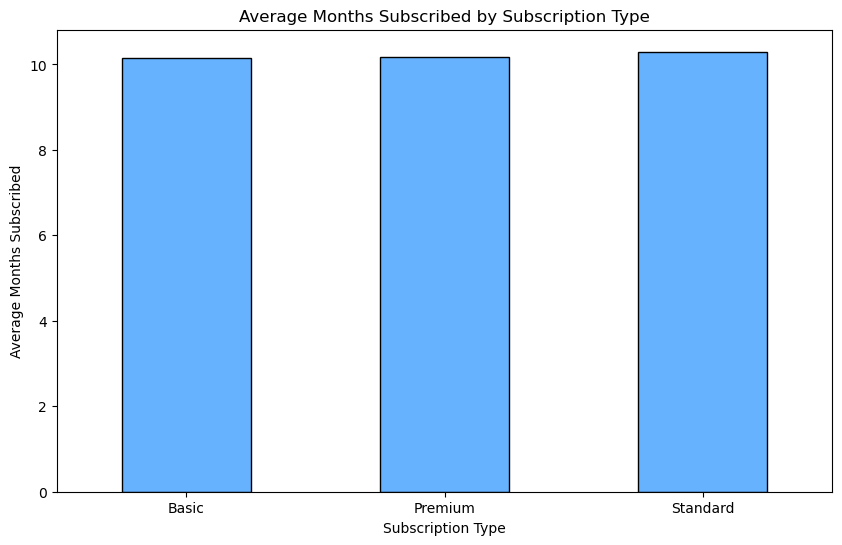

In [15]:
import matplotlib.pyplot as plt

# Calculating months subscribed based on the reference date
data["Months Subscribed"] = ((reference_date - data["Join Date"]).dt.days) // 30

# Average months subscribed by subscription type
avg_months_subscribed = data.groupby("Subscription Type")["Months Subscribed"].mean()
print("Average Months Subscribed by Subscription Type:\n", avg_months_subscribed)

# Visualizing months subscribed with a bar plot
plt.figure(figsize=(10, 6))
avg_months_subscribed.plot(kind='bar', color="#66b2ff", edgecolor="black")
plt.title("Average Months Subscribed by Subscription Type")
plt.xlabel("Subscription Type")
plt.ylabel("Average Months Subscribed")
plt.xticks(rotation=0)
plt.show()



Monthly Revenue by Churn Risk:
 At Risk of Churn
False    31261
True        10
Name: Monthly Revenue, dtype: int64


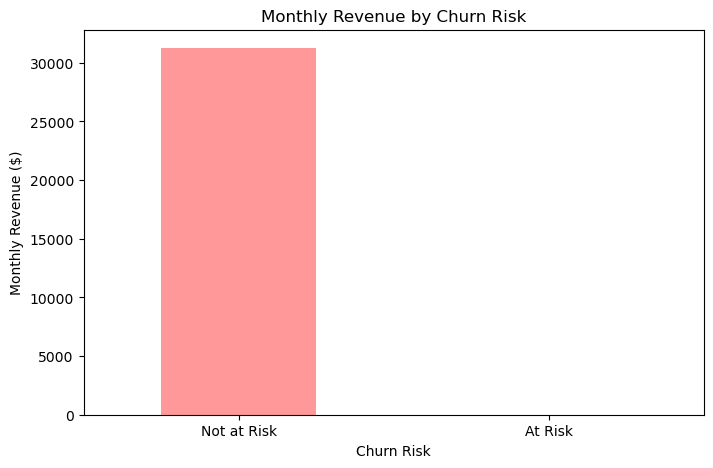

In [16]:
# Total monthly revenue split by at-risk status
monthly_revenue_by_risk = data.groupby("At Risk of Churn")["Monthly Revenue"].sum()
print("Monthly Revenue by Churn Risk:\n", monthly_revenue_by_risk)

# Visualizing monthly revenue by churn risk
plt.figure(figsize=(8, 5))
monthly_revenue_by_risk.plot(kind='bar', color=["#ff9999", "#66b2ff"])
plt.title("Monthly Revenue by Churn Risk")
plt.xlabel("Churn Risk")
plt.ylabel("Monthly Revenue ($)")
plt.xticks([0, 1], ["Not at Risk", "At Risk"], rotation=0)
plt.show()


Churn Rate by Subscription Type (%):
 Subscription Type
Basic       0.1001
Premium     0.0000
Standard    0.0000
Name: At Risk of Churn, dtype: float64


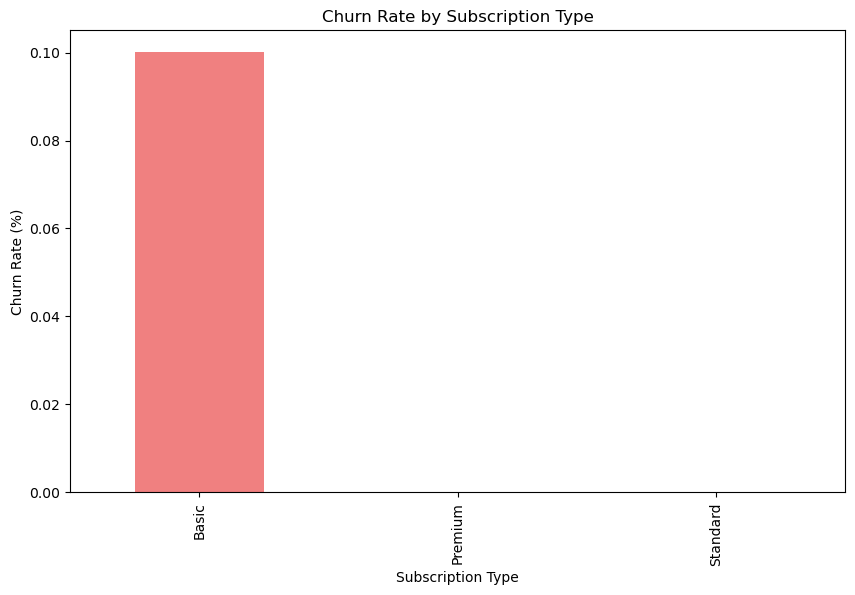

In [17]:
# Calculating churn rate by subscription type
churn_rate_by_subscription = data.groupby("Subscription Type")["At Risk of Churn"].mean() * 100
print("Churn Rate by Subscription Type (%):\n", churn_rate_by_subscription)

# Visualizing churn rate by subscription type
plt.figure(figsize=(10, 6))
churn_rate_by_subscription.plot(kind='bar', color="lightcoral")
plt.title("Churn Rate by Subscription Type")
plt.xlabel("Subscription Type")
plt.ylabel("Churn Rate (%)")
plt.show()
